In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('mail'):
    for filename in filenames:
        os.path.join(dirname, filename)
files = os.listdir('mail')
print(files)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['6-14msg3.txt', '6-110msg1.txt', '9-63msg1.txt', 'spmsga95.txt', '6-97msg1.txt', '8-887msg1.txt', 'spmsgb16.txt', '6-830msg1.txt', '9-612msg1.txt', 'spmsga161.txt', 'spmsgc135.txt', '6-113msg2.txt', '6-829msg3.txt', 'spmsga130.txt', 'spmsgc119.txt', 'spmsga65.txt', '3-390msg0.txt', '3-389msg1.txt', 'spmsgc133.txt', '5-1318msg2.txt', 'spmsgb77.txt', 'spmsgc68.txt', '3-378msg5.txt', '8-840msg1.txt', '6-1msg1.txt', '6-68msg1.txt', '5-1315msg2.txt', 'spmsgc37.txt', '6-455msg1.txt', '6-50msg0.txt', 'spmsgc74.txt', '6-425msg3.txt', '6-55msg1.txt', 'spmsgb3.txt', 'spmsga163.txt', '6-266msg1.txt', '5-1304msg1.txt', '6-248msg1.txt', 'spmsga146.txt', '8-922msg3.txt', '6-76msg1.txt', '6-64msg1.txt', '6-146msg1.txt', 'spmsgc130.txt', 'spmsgc102.txt', '6-256msg1.txt', '8-922msg1.txt', 'spmsgc104.txt', '5-1300msg3.txt', 'spmsgb106.txt', 'spmsgb24.txt', '8-972msg1.txt', '8-951msg1.txt', 'spmsga35.txt', 'spmsgb152.txt', '3-380msg6.txt', '6-380msg1.txt', '9-87msg1.txt', 'spmsgc46.txt', '6-430msg5.txt'

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project)
Create a model that can be used in order to recognize if emails are spam or not. This model should work with at least 78% accuracy and will be built using a dump of emails that are labeled spmsg in the file name if spam and don't have this in the name if they aren't so I will be using a form of supervised learning in this project. The emails are txt files that must be opened and the contents extracted to examine the data and find information that will be valuable to creating the model.

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)
The data has been provided in the form of a folder of txt files that contain the contents of both spam and nonspam emails that will need to be cleaned prior to future usage due to the texts of each email not being able to be used directlty with models. There are no missing values in this dataset so no emails will have to be dropped from the data as of now.

In [2]:
ham_emails = []
spam_emails = []
allemails = {"emailtype" : [], "emailcontent" : []}
df = pd.DataFrame(columns = ["emailtype", "emailcontent"])
for file in files:
    path= 'mail/' + file
    if os.path.isdir(path):
        files.remove(file)
        continue
    elif 'spmsg' in path:
        f = open(path, 'r')
        spam_emails.append(f.read())
        f = open(path, 'r')
        allemails["emailcontent"].append(f.read().splitlines())
        allemails['emailtype'].append('spam')
    else:
        f = open(path, 'r')
        ham_emails.append(f.read())
        f = open(path, 'r')
        allemails["emailcontent"].append(f.read().splitlines())
        allemails['emailtype'].append('ham')
    

In [3]:
df = pd.DataFrame.from_dict(allemails)
df

,emailtype,emailcontent
0,ham,[Subject: wkshp : * early * - e ( = ) uralic i...
1,ham,"[Subject: job announcement - academium sinica,..."
2,ham,"[Subject: knowledge language bibliography, , a..."
3,spam,"[Subject: service update, , due significant ra..."
4,ham,"[Subject: job announcement, , job announcement..."
...,...,...
866,spam,"[Subject: personal message . . . . ., , place ..."
867,spam,"[Subject: did right email address ?, , "" show ..."
868,spam,"[Subject: 95 . 8 capital fm, , http : / / capi..."
869,ham,"[Subject: avail review, , book list below ling..."


In [4]:
df['emailtype'].value_counts()

emailtype
ham     480
spam    391
Name: count, dtype: int64

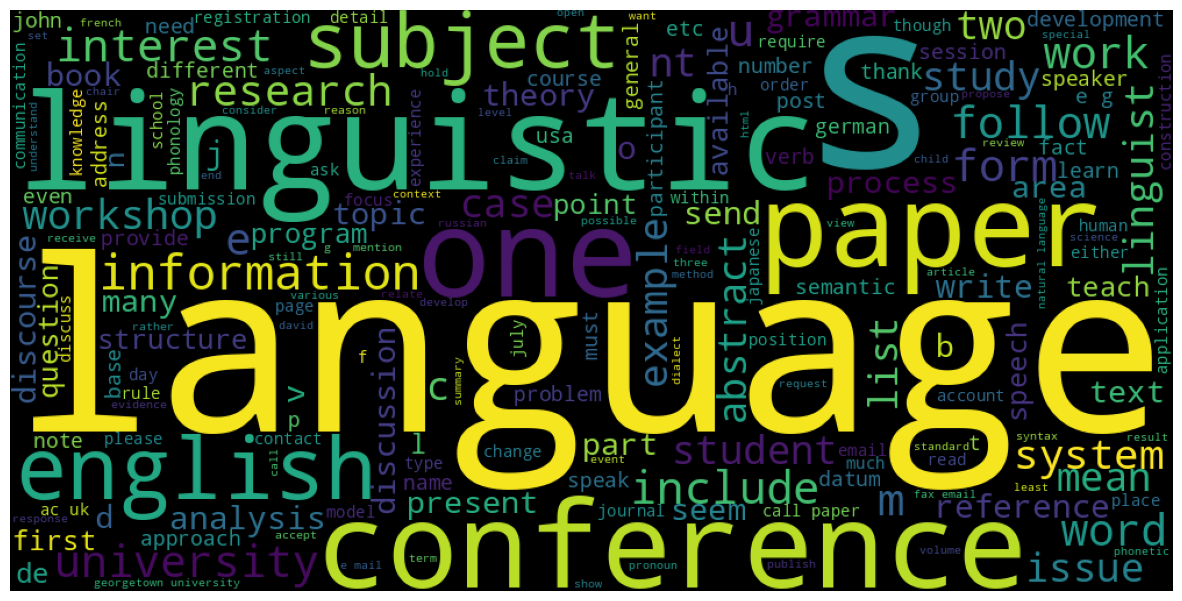

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
ham_string = (" ").join(ham_emails)
ham_string = ham_string.lower()
ham_string = ham_string.translate(str.maketrans('','',string.punctuation))
wordcloud = WordCloud(width = 1000, height = 500).generate(ham_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

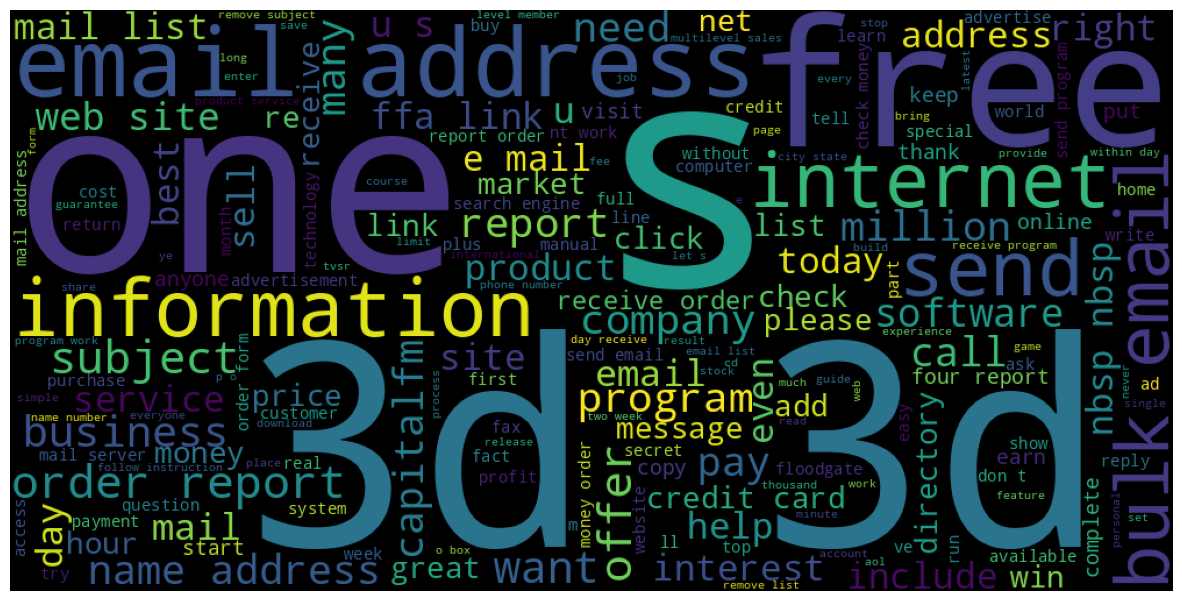

In [6]:
spam_string = (" ").join(spam_emails)
spam_string = spam_string.lower()
spam_string = spam_string.translate(str.maketrans('','',string.punctuation))
wordcloud2 = WordCloud(width = 1000, height = 500).generate(spam_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias
To explore the data I first needed to convert make it usable. First I created lists that contain the contents of the txt files of every both spam and ham emails. The elements of these lists were then all added to a single string so that 2 wordclouds could be created one for spam emails and one for ham emails. When creating these strings I converted all words to lowercase and removed all punctuation in order to prevent hyphens from coming up in my wordclouds and recognize all instances of a word no matter the capitalization used in the email. Additionally I created a data frame containing every email with a label of either spam or ham that will be useful when preparing the data. I also used value_counts to determine how many spam and ham emails there were and there appears to be 90 more ham emails than spam so that will be something to pay attention to. By examining the wordclouds it seems that the ham emails tend to contain words that are related to school or work such as language, university, book, workshop, student, and etc. The wordcloud for the spam emails, however tends to include more words related to personal info and sales such as free, name, address, send, profit, millon, and etc.

In [7]:
def remove_punct(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    return ''.join(text)
df['emailcontent'] = [remove_punct(str(x)) for x in df['emailcontent']]
df

,emailtype,emailcontent
0,ham,Subject wkshp early e uralic interactio...
1,ham,Subject job announcement academium sinica jo...
2,ham,Subject knowledge language bibliography assoc...
3,spam,Subject service update due significant rapid ...
4,ham,Subject job announcement job announcement dep...
...,...,...
866,spam,Subject personal message place ad one sm...
867,spam,Subject did right email address show money ...
868,spam,Subject 95 8 capital fm http capitalfm c...
869,ham,Subject avail review book list below linguist...


In [8]:
df['emailtype'] = df['emailtype'].replace("spam", 0)
df['emailtype'] = df['emailtype'].replace("ham", 1)
df

,emailtype,emailcontent
0,1,Subject wkshp early e uralic interactio...
1,1,Subject job announcement academium sinica jo...
2,1,Subject knowledge language bibliography assoc...
3,0,Subject service update due significant rapid ...
4,1,Subject job announcement job announcement dep...
...,...,...
866,0,Subject personal message place ad one sm...
867,0,Subject did right email address show money ...
868,0,Subject 95 8 capital fm http capitalfm c...
869,1,Subject avail review book list below linguist...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['emailcontent'])
vectors2 = vectorizer.fit(df['emailcontent'])
vectors.shape

(871, 26331)

In [10]:
from sklearn.model_selection import train_test_split
features = vectors
X_train, X_test, y_train, y_test = train_test_split(features, df['emailtype'], test_size=0.2, random_state=42)

# 4.Prepare the Data


Apply any data transformations and explain what and why
Besides what was done in previous steps I have removed punctuation from the content of emails that is stored in a dataframe because it will not be useful when converting words to vectors in order to use to build models. following this i replaced the spam emailtypes with 0 and ham emaileypes with 1 since it will be more compatible with the models I will be creating. Then I used a tfidfVectorizer to create vectors from the words in the emails within the dataset. I chose this vectorization method because focuses on the frequency of words, and provides the importance of words, which will be useful when creating models as I can remove words that are messing up the model. Finally, I created a train_test_split with the words that have been converted to vectors and the labels, leaving me with the data that I will be using in my model creation process.

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
from math import sqrt
print(sqrt(mse))
score

0.1851640199545103


0.9657142857142857

In [13]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [14]:
y_pred2 = svc.predict(X_test)
score2 = svc.score(X_test, y_test)
mse2 = mean_squared_error(y_test,y_pred2)
print(sqrt(mse2))
score2

0.2


0.96

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred3 = dtc.predict(X_test)
score3 = dtc.score(X_test, y_test)
mse3 = mean_squared_error(y_test,y_pred3)
print(sqrt(mse3))
score3

0.31167748898959186


0.9028571428571428

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with
After experimenting with 3 different models, I have decided to use Logistic Regression because it produces the best score and rmse of the 3 models with a score of 0.966 and rmse of 0.185. 

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([('classifier', lr)])
params = {'classifier' : [lr], 'classifier__penalty' : ['l1', 'l2'], 'classifier__C' : np.logspace(-4, 4, 20), 'classifier__C' : np.logspace(-4, 4, 20), 'classifier__solver' : ['liblinear']}
classifier = GridSearchCV(pipeline, param_grid = params, cv = 7, verbose = True, n_jobs = -1)
bestclassifier = classifier.fit(X_train, y_train)

Fitting 7 folds for each of 40 candidates, totalling 280 fits


In [18]:
bestclassifier.best_params_

{'classifier': LogisticRegression(),
 'classifier__C': 3792.690190732246,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [19]:
lr = LogisticRegression(C = 3792.690190732246, penalty = 'l1', solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=3792.690190732246, penalty='l1', solver='liblinear')

In [20]:
y_predfinal = lr.predict(X_test)
scorefinal = lr.score(X_test, y_test)
msefinal = mean_squared_error(y_test,y_predfinal)
print(sqrt(msefinal))
scorefinal

0.13093073414159542


0.9828571428571429

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 
I used a GridSearchCV in order to find the best choices for several parameters that are a part of the Logistic Regression model because it provides a highly accurate assessment of the best parameters thanks to cross validation, which I set at the value of 7 as it was the highest value I could set it to that yielded improved results. The best parameters for the model ended up being a C value of 3792.690190732246, a penalty of l1 and the solver liblinear. By implementing these parameters I saw a 0.017 increase in score and an rmse decrease of 0.054.

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken
After experimenting with a few different models and parameters, I have determined that the most effective for the task of determining whether or not emails are spam or ham is a logistic regression model with the parameters of a C value of 3792.690190732246, a penalty value of l1, and a solver value of liblinear. In order to come to decision of the best model I first had to clean the data to create a proper model. I cleaned the data for usage by creating a dataframe in which the body of each email stripped of punctuation was labeled with a corresponding 0 if it was a spam email and 1 if it was a ham email. I then used a vectorizer in order to transform the words into vectors with values that correspond to the frequency and significance of words. These vectors and ham/spam labels in the forms of 1s and 0s were then split into training and test sets for usage. I chose to use a logistic regression model because it had a better score and rmse than the other models that I used which were an SVC model and decisiontreeclassifier. Following this, I used a gridsearch with a 7 fold cross validation in order to find the most accurate hyperparameters for my model. Following this, I implemented them into the logistic regression model and fit it to the data, creating the final model.

In [21]:
import pickle
pickle.dump(lr, open('lrmodel.pkl','wb'))
pickle.dump(vectors2, open('vectorizer.pkl', 'wb'))

In [22]:
def predictor(email:str):
    model = pickle.load(open('lrmodel.pkl','rb'))
    vectorizer = pickle.load(open('vectorizer.pkl','rb'))
    email = email.translate(str.maketrans('', '', string.punctuation))
    df2 = pd.DataFrame({'emailcontent' : [email]})
    integers = vectorizer.transform(df2['emailcontent'])
    prediction = model.predict(integers)
    if prediction[0] == 0:
        return 'spam'
    if prediction[0] == 1:
        return 'ham'
predictor('huge savings long distance call home away = 20 home . = 20 celebrate free re-chargable telecard . = 20 anytime , anywhere u . s . pay 19 cent per minute . phone card hand everyone = 20 need easy inexpensive phone call . = 20 everybody harvest benefit own own pre - pay = 20 phone card . = 20 * * start saving money long distance today ! = 20 here s few advantage pre - pay phone card offer : = 20 * low domestic international long distance rate . medium telecom = 20 phone card long distance rate substantially lower most = payphone , = 20 collect call card rate , whether call across street , = part u . s . price  always  same . . . 19 cents . * rate same matter day , day = week . = 20 * phone surcharge : toll - free access number let avoid call')

'spam'

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 
This function takes the body of an email as input and takes the same data cleaning measures that were used for the training and test data. Then the function uses the model to make a prediction on whether the email is spam or ham and returns whatever the prediction is.